# Exercise 4: Emotion Detection

The goal of this exercise is to use Py-Feat to detect faces in a live feed from your webcam.

* Use `cv2` for webcam capture.
* Use `jcv2` to display a life feed of the webcam.
* You should constantly display a rectangle around each detected face, just like the "recording" mode in Exercise 3.
* Additionaly, you should display the currently detected primary emotion as a text label on top of the rectangle.

In [18]:
import cv2
import opencv_jupyter_ui as jcv2
from feat import Detector
from IPython.display import Image

from feat.utils import FEAT_EMOTION_COLUMNS

This is an example of how the frames in your feed should look like:

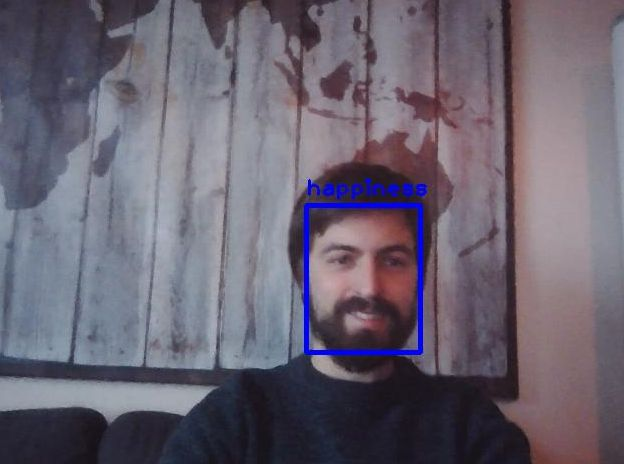

In [19]:
Image("exercise_4_example.jpg")

In [20]:
detector = Detector(device="cuda")

INFO:root:Loading Face model: retinaface
g:\My Drive\Uppsala\IIS\venv\Lib\site-packages\feat\face_detectors\Retinaface\Retinaface_test.py:70: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimen

In [21]:
detector = Detector(device="cpu")

INFO:root:Loading Face model: retinaface
g:\My Drive\Uppsala\IIS\venv\Lib\site-packages\feat\face_detectors\Retinaface\Retinaface_test.py:70: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimen

In [ ]:
# Your code here
cv2.namedWindow("Webcam Feed")
cap = cv2.VideoCapture(0)
while True:
    ret, frame = cap.read()
    if not ret:
        break

    faces = detector.detect_faces(frame)
    landmarks = detector.detect_landmarks(frame, faces)
    emotions = detector.detect_emotions(frame, faces, landmarks)

    faces = faces[0]
    landmarks = landmarks[0]
    emotions = emotions[0]

    strongest_emotion = emotions.argmax(axis=1)


    # draw rectangles around the faces
    for (face, top_emo) in zip(faces, strongest_emotion):
        (x0, y0, x1, y1, p) = face
        cv2.rectangle(frame, (int(x0), int(y0)), (int(x1), int(y1)), (255, 0, 0), 3)
        cv2.putText(frame, FEAT_EMOTION_COLUMNS[top_emo], (int(x0), int(y0 - 10)), cv2.FONT_HERSHEY_PLAIN, 1.5, (255, 0, 0), 2)

        
    jcv2.imshow("Webcam Feed", frame)
    key = cv2.waitKey(1)
    if key == 27:
        break

INFO:root:detecting faces...
INFO:root:detecting landmarks...
INFO:root:RESCALING WARNING: image_operations.extract_face_from_bbox() is rescaling cropped img with shape torch.Size([3, 374, 374]) to 112
INFO:root:detecting emotions...


SyntaxError: 'break' outside loop (2647169551.py, line 36)